# 文献

## extRemes

https://ral.ucar.edu/staff/ericg/extRemes/

## 日本語

https://qiita.com/hrkz_szk/items/43debffda9697d9dd7a9

#  理論

|分布名（E）|分布名(J)|用途|関数形|
| :---: | :---: | :---:| -------------:|
|generalized extreme  value(GEV) df|一般極値分布|年間最大値など| $$\begin{align} G(z) = {\rm e}^{-\left\{1+\xi\left(\frac{z-\mu}{\sigma}\right)\right\}^{-1/\xi}_{+}}\end{align}$$|
|generalized Pareto (GP) df |一般パレート分布|閾値以上のサンプルの分析

# preparations

In [23]:
install.packages("devtools")

also installing the dependencies ‘ps’, ‘ini’, ‘processx’, ‘desc’, ‘prettyunits’, ‘withr’, ‘xopen’, ‘clipr’, ‘clisymbols’, ‘fs’, ‘gh’, ‘glue’, ‘whisker’, ‘callr’, ‘cli’, ‘git2r’, ‘memoise’, ‘pkgbuild’, ‘pkgload’, ‘rcmdcheck’, ‘remotes’, ‘rstudioapi’, ‘sessioninfo’, ‘usethis’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [29]:
tmp = old.packages()

In [26]:
devtools::install_github("ricardo-bion/ggtech", 
                          dependencies=TRUE)

ERROR: Error in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]): namespace ‘glue’ 1.1.1 is already loaded, but >= 1.2.0 is required


In [2]:
install.packages("extRemes")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# analysis on extRemes Quick Start Guide

In [3]:
library(extRemes)

Loading required package: Lmoments
Loading required package: distillery

Attaching package: ‘extRemes’

The following objects are masked from ‘package:stats’:

    qqnorm, qqplot



In [4]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [5]:
data(Fort)

In [4]:
names(Fort)

[1] "obs"   "tobs"  "month" "day"   "year"  "Prec"

## 各年における最大値集計

In [8]:
bmFort <- blockmaxxer(Fort, blocks = Fort$year, which="Prec")

In [12]:
Fort %>% head

obs,tobs,month,day,year,Prec
1,1,1,1,1900,0
2,2,1,2,1900,0
3,3,1,3,1900,0
4,4,1,4,1900,0
5,5,1,5,1900,0
6,6,1,6,1900,0


In [11]:
bmFort %>% head

,obs,tobs,month,day,year,Prec
119,119,119,4,29,1900,2.39
507,507,142,5,22,1901,2.32
994,994,264,9,21,1902,4.34
1398,1398,303,10,30,1903,0.85
1583,1583,123,5,2,1904,3.02
1917,1917,91,4,1,1905,1.74


In [14]:
bmFort %>% dim

[1] 100   6

In [16]:
bmFort_long  = bmFort %>% gather(key = key  , value = value , - year)

In [20]:
bmFort_long %>% head

year,key,value
1900,obs,119
1901,obs,507
1902,obs,994
1903,obs,1398
1904,obs,1583
1905,obs,1917


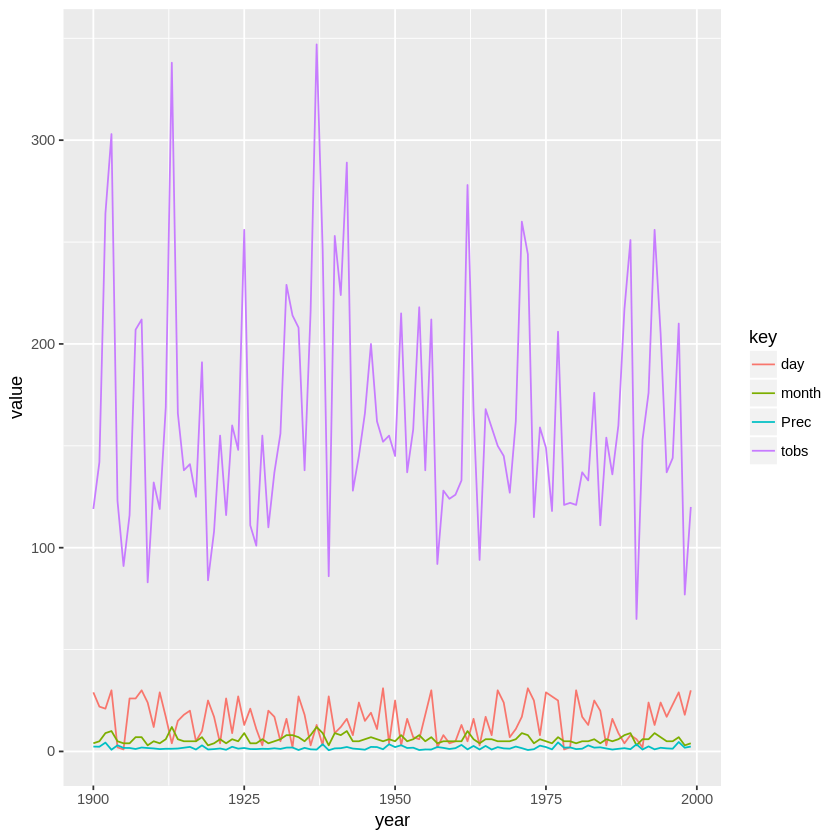

In [21]:
ggplot(bmFort_long %>% filter(key != "obs"), aes(x = year , y = value , color = key)) + geom_line()

## Fit a GEV distribution to annual maximum Precipitation in Fort Collins, Colorado, U.S.A.

In [43]:
?fevd

fevd {extRemes},R Documentation
x,"fevd: x can be a numeric vector, the name of a column of data or a formula giving the data to which the EVD is to be fit. In the case of the latter two, the data argument must be specified, and must have appropriately named columns. plot and print method functions: any list object returned by fevd."
object,A list object of class “fevd” as returned by fevd.
data,"A data frame object with named columns giving the data to be fit, as well as any data necessary for modeling non-stationarity through the threshold and/or any of the parameters."
threshold,"numeric (single or vector). If fitting a peak over threshold (POT) model (i.e., type = “PP”, “GP”, “Exponential”) this is the threshold over which (non-inclusive) data (or excesses) are used to estimate the parameters of the distribution function. If the length is greater than 1, then the length must be equal to either the length of x (or number of rows of data) or to the number of unique arguments in threshold.fun."
threshold.fun,formula describing a model for the thresholds using columns from data. Any valid formula will work. data must be supplied if this argument is anything other than ~ 1. Not for use with method “Lmoments”.
"location.fun, scale.fun, shape.fun",formula describing a model for each parameter using columns from data. data must be supplied if any of these arguments are anything other than ~ 1.
use.phi,"logical; should the log of the scale parameter be used in the numerical optimization (for method “MLE”, “GMLE” and “Bayesian” only)? For the ML and GML estimation, this may make things more stable for some data."
type,"fevd: character stating which EVD to fit. Default is to fit the generalized extreme value (GEV) distribution function (df). plot method function: character describing which plot(s) is (are) desired. Default is “primary”, which makes a 2 by 2 panel of plots including the QQ plot of the data quantiles against the fitted model quantiles (type “qq”), a QQ plot (“qq2”) of quantiles from model-simulated data against the data, a density plot of the data along with the model fitted density (type “density”) and a return level plot (type “rl”). In the case of a stationary (fixed) model, the return level plot will show return levels calculated for return periods given by return.period, along with associated CIs (calculated using default method arguments depending on the estimation method used in the fit. For non-stationary models, the data are plotted as a line along with associated effective return levels for return periods of 2, 20 and 100 years (unless return.period is specified by the user to other values. Other possible values for type include “hist”, which is similar to “density”, but shows the histogram for the data and “trace”, which is not used for L-moment fits. In the case of MLE/GMLE, the trace yields a panel of plots that show the negative log-likelihood and gradient negative log-likelihood (note that the MLE gradient is currently used even for GMLE) for each of the estimated parameter(s); allowing one parameter to vary according to prange, while the others remain fixed at their estimated values. In the case of Bayesian estimation, the “trace” option creates a panel of plots showing the posterior df and MCMC trace for each parameter."
method,fevd: character naming which type of estimation method to use. Default is to use maximum likelihood estimation (MLE).
initial,"A list object with any named parameter component giving the initial value estimates for starting the numerical optimization (MLE/GMLE) or the MCMC iterations (Bayesian). In the case of MLE/GMLE, it is best to obtain a good intial guess, and in the Bayesian case, it is perhaps better to choose poor initial estimates. If NULL (default), then L-moments estimates and estimates based on Gumbel moments will be calculated, and whichever yields the lowest negative log-likelihood is used. In the case of type “PP”, an additional MLE/GMLE estimate is made for the g

In [34]:
fitGEV <- fevd(Prec, data = bmFort)

In [35]:
fitGEV


fevd(x = Prec, data = bmFort)

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  104.9645 


 Estimated parameters:
 location     scale     shape 
1.3466597 0.5328046 0.1736264 

 Standard Error Estimates:
  location      scale      shape 
0.06168793 0.04878843 0.09195458 

 Estimated parameter covariance matrix.
             location         scale         shape
location  0.003805401  0.0017067043 -0.0020838301
scale     0.001706704  0.0023803113 -0.0008692638
shape    -0.002083830 -0.0008692638  0.0084556445

 AIC = 215.9291 

 BIC = 223.7446 

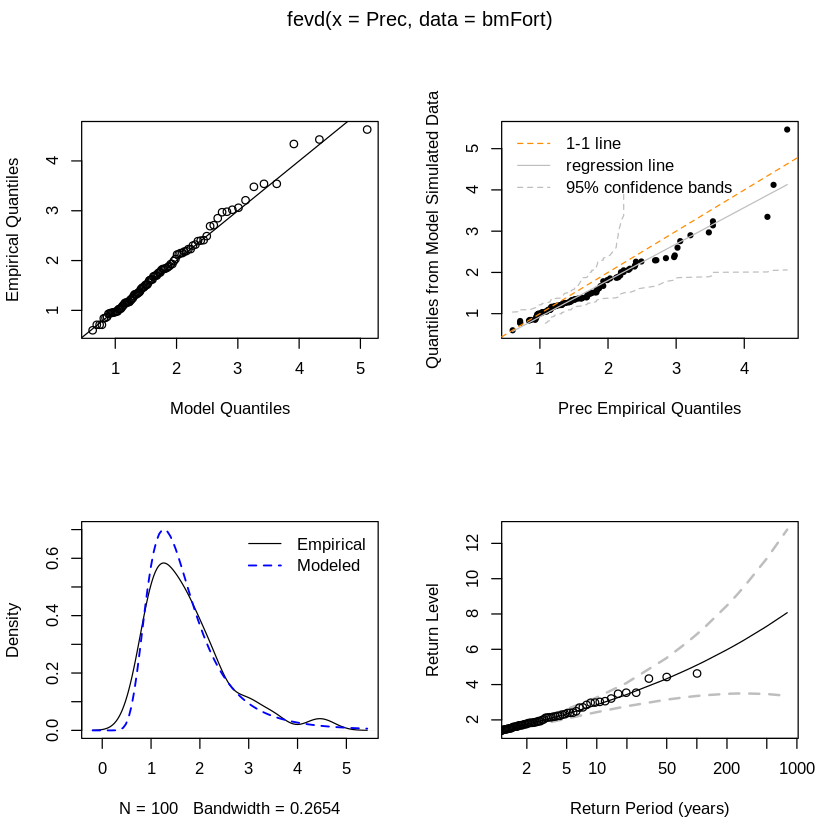

In [36]:
plot(fitGEV)

In [ ]:
plot(fitGEV, "trace")

## Select a threshold for daily data from above.

In [42]:
?threshrange.plot

threshrange.plot {extRemes},R Documentation
x,numeric vector of data.
r,numeric vector of length two giving the range of thresholds.
type,character string stating which model to fit.
nint,number of thresholds to use.
alpha,number between zero and one stating which 1 - alpha confidence level to use for the confidence limits.
na.action,function to be called to handle missing values.
set.panels,logical; should the function set the panels on the device (TRUE) or not (FALSE).
verbose,logical; should progress information be printed to the screen?
...,optional arguments to fevd.


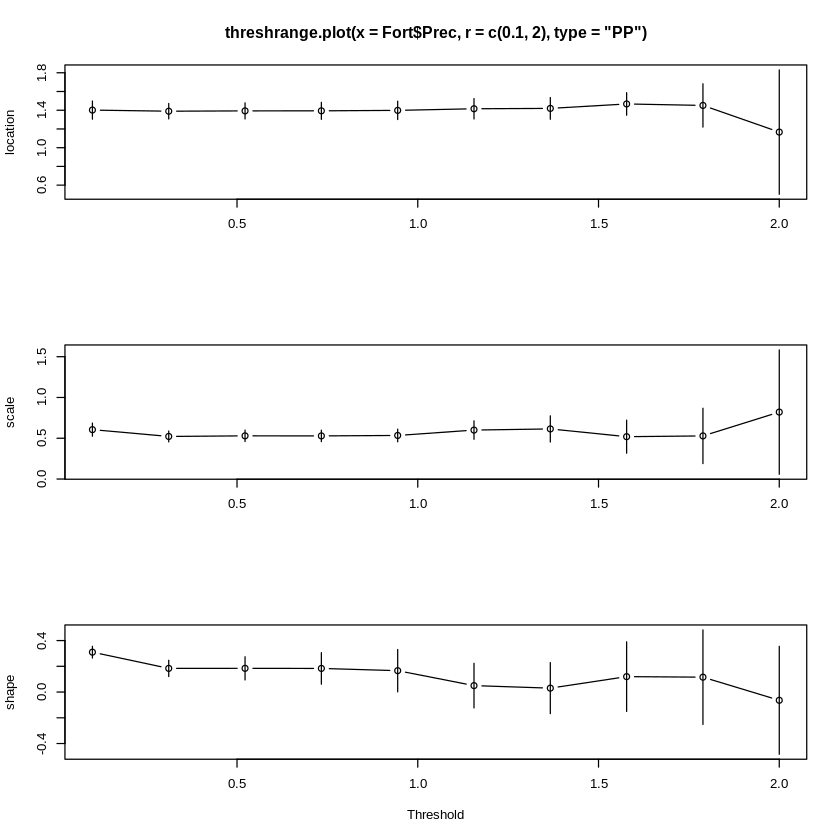

In [37]:
threshrange.plot(Fort$Prec, c(0.1, 2), type = "PP")

## Fit the PP model to the daily data from above.

In [41]:
?fevd

fevd {extRemes},R Documentation
x,"fevd: x can be a numeric vector, the name of a column of data or a formula giving the data to which the EVD is to be fit. In the case of the latter two, the data argument must be specified, and must have appropriately named columns. plot and print method functions: any list object returned by fevd."
object,A list object of class “fevd” as returned by fevd.
data,"A data frame object with named columns giving the data to be fit, as well as any data necessary for modeling non-stationarity through the threshold and/or any of the parameters."
threshold,"numeric (single or vector). If fitting a peak over threshold (POT) model (i.e., type = “PP”, “GP”, “Exponential”) this is the threshold over which (non-inclusive) data (or excesses) are used to estimate the parameters of the distribution function. If the length is greater than 1, then the length must be equal to either the length of x (or number of rows of data) or to the number of unique arguments in threshold.fun."
threshold.fun,formula describing a model for the thresholds using columns from data. Any valid formula will work. data must be supplied if this argument is anything other than ~ 1. Not for use with method “Lmoments”.
"location.fun, scale.fun, shape.fun",formula describing a model for each parameter using columns from data. data must be supplied if any of these arguments are anything other than ~ 1.
use.phi,"logical; should the log of the scale parameter be used in the numerical optimization (for method “MLE”, “GMLE” and “Bayesian” only)? For the ML and GML estimation, this may make things more stable for some data."
type,"fevd: character stating which EVD to fit. Default is to fit the generalized extreme value (GEV) distribution function (df). plot method function: character describing which plot(s) is (are) desired. Default is “primary”, which makes a 2 by 2 panel of plots including the QQ plot of the data quantiles against the fitted model quantiles (type “qq”), a QQ plot (“qq2”) of quantiles from model-simulated data against the data, a density plot of the data along with the model fitted density (type “density”) and a return level plot (type “rl”). In the case of a stationary (fixed) model, the return level plot will show return levels calculated for return periods given by return.period, along with associated CIs (calculated using default method arguments depending on the estimation method used in the fit. For non-stationary models, the data are plotted as a line along with associated effective return levels for return periods of 2, 20 and 100 years (unless return.period is specified by the user to other values. Other possible values for type include “hist”, which is similar to “density”, but shows the histogram for the data and “trace”, which is not used for L-moment fits. In the case of MLE/GMLE, the trace yields a panel of plots that show the negative log-likelihood and gradient negative log-likelihood (note that the MLE gradient is currently used even for GMLE) for each of the estimated parameter(s); allowing one parameter to vary according to prange, while the others remain fixed at their estimated values. In the case of Bayesian estimation, the “trace” option creates a panel of plots showing the posterior df and MCMC trace for each parameter."
method,fevd: character naming which type of estimation method to use. Default is to use maximum likelihood estimation (MLE).
initial,"A list object with any named parameter component giving the initial value estimates for starting the numerical optimization (MLE/GMLE) or the MCMC iterations (Bayesian). In the case of MLE/GMLE, it is best to obtain a good intial guess, and in the Bayesian case, it is perhaps better to choose poor initial estimates. If NULL (default), then L-moments estimates and estimates based on Gumbel moments will be calculated, and whichever yields the lowest negative log-likelihood is used. In the case of type “PP”, an additional MLE/GMLE estimate is made for the g

In [39]:
fitPP <- fevd(Prec, data = Fort, threshold = 0.395, 
        type = "PP", units = "inches")
fitPP


fevd(x = Prec, data = Fort, threshold = 0.395, type = "PP", units = "inches")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  -1359.817 


 Estimated parameters:
 location     scale     shape 
1.3834415 0.5319389 0.2119119 

 Standard Error Estimates:
  location      scale      shape 
0.04315841 0.03692786 0.03840313 

 Estimated parameter covariance matrix.
            location       scale       shape
location 0.001862648 0.001287211 0.000645549
scale    0.001287211 0.001363667 0.001196875
shape    0.000645549 0.001196875 0.001474800

 AIC = -2713.635 

 BIC = -2698.734 

Warning message in get(paste0("plot.", newcl))(x = x, type = type, rperiods = rperiods, :
“plot.fevd.mle: span or npy not integers; determination of max in each block may be substantially in error when there are many blocks.”

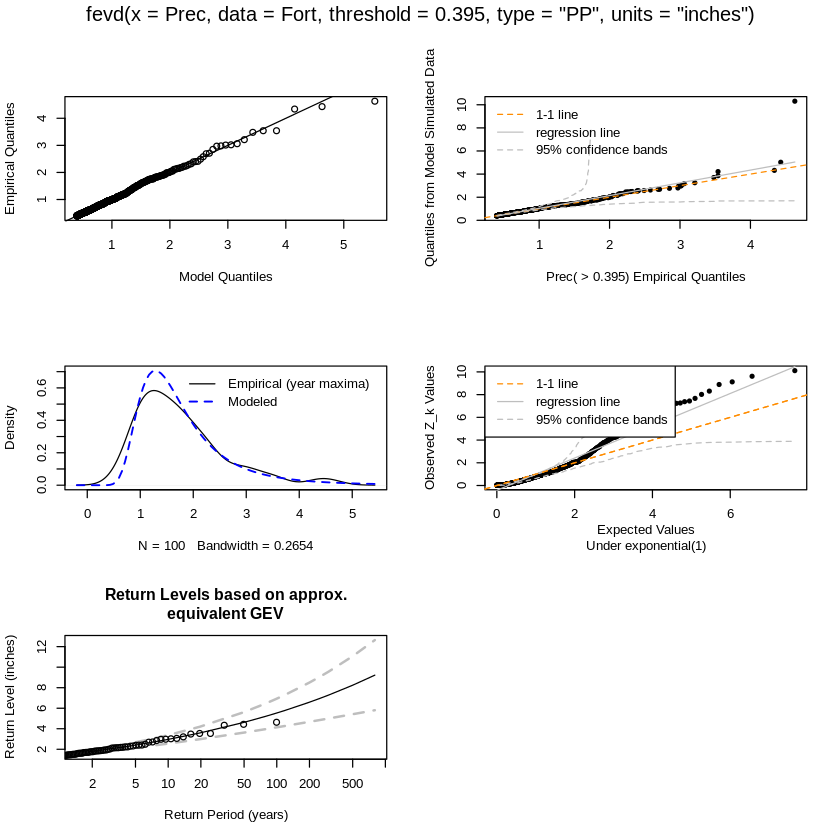

In [40]:
plot(fitPP)

In [ ]:
atdf(Fort$Prec, 0.395)

extremalindex(Fort$Prec, 0.395, blocks=Fort$year)

dcFort <- decluster(Fort$Prec, 0.395, r = 9)
plot(dcFort)


## sandbox

In [9]:
?blockmaxxer

blockmaxxer {extRemes},R Documentation
x,"An object of class “fevd” where the fit is for a PP model, a numeric vector, matrix or data frame."
...,optional arguments to max.
which,"number or name of a column indicating for which column to take the block maxima. Note, this does not take componentwise maxima (as in the multivariate setting). Instead, it takes the maxima for a single column and returns a vector, data frame or matrix of the block maxima for that column along with the entire row where that maxima occurred."
blocks,numeric (integer or factor) vector indicating the blocks over which to take the maxima. Must be non-NULL if blen and span are NULL.
blen,"(optional) may be used instead of the blocks argument, and span must be non-NULL. This determines the length of the blocks to be created. Note, the last block may be smaller or larger than blen. Ignored if blocks is not NULL."
span,"(optional) must be specified if blen is non-NULL and blocks is NULL. This is the number of blocks over which to take the maxima, and the returned value will be either a vector of length equal to span or a matrix or data frame with span rows."


# financial example

https://qiita.com/hrkz_szk/items/43debffda9697d9dd7a9

In [52]:
install.packages("ismev")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [54]:
install.packages("evir")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [60]:
install.packages("timeSeries")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [57]:
library(ismev)

Loading required package: mgcv
Loading required package: nlme

Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

This is mgcv 1.8-22. For overview type 'help("mgcv-package")'.


In [61]:
library(timeSeries)

Loading required package: timeDate


In [55]:
library(evir)
data(siemens)
head(siemens)


Attaching package: ‘evir’

The following object is masked from ‘package:ggplot2’:

    qplot

The following object is masked from ‘package:extRemes’:

    decluster



[1]  0.014347448  0.010861972  0.007020857  0.001863933  0.000000000
[6] -0.001397624

In [62]:
SieDates <- as.character(format(as.POSIXct(attr(siemens, "times")), "%Y-%m-%d"))
SieRet <- timeSeries(siemens * 100, charvec = SieDates)

In [68]:
SieRet %>% class


[1] "timeSeries"
attr(,"package")
[1] "timeSeries"

In [69]:
SieLoss = - siemens 

In [70]:
SieGEV <- gev(SieLoss, block = "semester")
SieMaxima <- SieGEV$data
head(SieMaxima)


[1] 0.03519720 0.03589676 0.03425749 0.03187262 0.02768500 0.01839737

In [72]:
print(SieGEV)

$n.all
[1] 6146

$n
[1] 48

$data
 [1] 0.03519720 0.03589676 0.03425749 0.03187262 0.02768500 0.01839737
 [7] 0.03589655 0.02450889 0.02942700 0.01296933 0.02306394 0.01863408
[13] 0.02791285 0.02063666 0.04999955 0.01646954 0.03322852 0.03929876
[19] 0.03533585 0.04488645 0.03291857 0.03198972 0.03263322 0.02054585
[25] 0.03088347 0.03426846 0.06602110 0.02835886 0.06386728 0.08656802
[31] 0.08177054 0.02519629 0.03093419 0.12011162 0.02691616 0.06006033
[37] 0.03419886 0.09380642 0.02018187 0.03393167 0.02834167 0.02278317
[43] 0.04905249 0.03450762 0.02092620 0.03340324 0.01793118 0.02135760

$block
[1] "semester"

$par.ests
        xi      sigma         mu 
0.28685307 0.01046794 0.02699867 

$par.ses
         xi       sigma          mu 
0.118201461 0.001307401 0.001689377 

$varcov
              [,1]         [,2]          [,3]
[1,]  1.397159e-02 1.362835e-05 -5.073578e-05
[2,]  1.362835e-05 1.709298e-06  1.350325e-06
[3,] -5.073578e-05 1.350325e-06  2.853995e-06

$converged
[1] 0



## fitting to GEV

In [73]:
fitgev <- fevd(SieMaxima, type = "GEV")
fitgev


fevd(x = SieMaxima, type = "GEV")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  -135.0959 


 Estimated parameters:
  location      scale      shape 
0.02699890 0.01046876 0.28676429 

 Standard Error Estimates:
   location       scale       shape 
0.001695538 0.001364415 0.117669637 

 Estimated parameter covariance matrix.
              location        scale         shape
location  2.874850e-06 1.420417e-06 -5.077329e-05
scale     1.420417e-06 1.861630e-06  1.221461e-05
shape    -5.077329e-05 1.221461e-05  1.384614e-02

 AIC = -264.1918 

 BIC = -258.5782 

In [74]:
distill(fitgev)

location             scale             shape              nllh 
     2.699890e-02      1.046876e-02      2.867643e-01     -1.350959e+02 
location.location    scale.location    shape.location    location.scale 
     2.874850e-06      1.420417e-06     -5.077329e-05      1.420417e-06 
      scale.scale       shape.scale    location.shape       scale.shape 
     1.861630e-06      1.221461e-05     -5.077329e-05      1.221461e-05 
      shape.shape 
     1.384614e-02